In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [21]:
import math
N=10000
d=10
total_reward=0
sum_of_rewards=[0]*d
number_of_selections=[0]*d
selected_ads=[]
for i in range(0,N):
    ad=0
    max_upper_bound=0
    for j in range(0,d):
        if number_of_selections[j]>0:
            average_reward = sum_of_rewards[j] / number_of_selections[j]
            delta_i = math.sqrt(3/2 * math.log(i + 1) / number_of_selections[j])
            upper_bound = average_reward + delta_i
        else:
            upper_bound=1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j
    selected_ads.append(ad)
    number_of_selections[ad]+=1
    reward=dataset.values[i,ad]
    sum_of_rewards[ad]+=reward
    total_reward+=reward


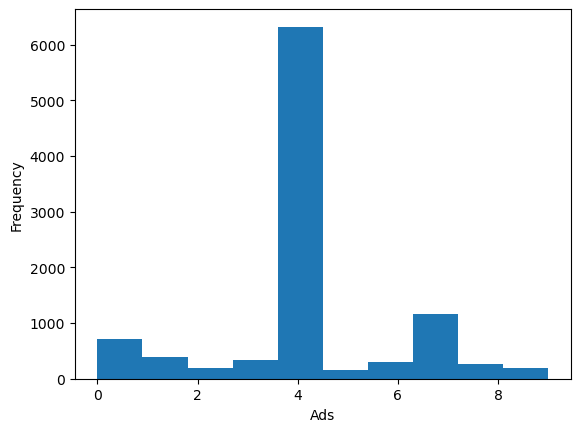

In [22]:
plt.hist(selected_ads)
plt.xlabel('Ads')
plt.ylabel('Frequency')
plt.show()